In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from matplotlib import pyplot as plt


In [ ]:
# Cargamos el dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


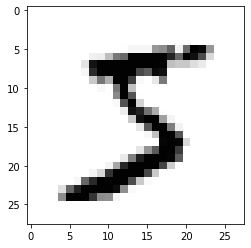

In [ ]:
# Vemos el contenido de un ejemplo
plt.imshow(X_train[0], cmap='Greys')

In [ ]:
# Realizamos un re-shape de los dataset para que sean compatibles con Keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Convertimos a float para la division posterior
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizamos los valores
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('Cantidad de Imagenes en x_train', X_train.shape[0])
print('Cantidad de Imagenes en X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in X_test 10000


In [ ]:
# Creamos un modelo minimo en base a la documentacion que se encuentra en la Web a fines de comparar contra los resultados de H2O

model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compilamos y entrenamos
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6193 - accuracy: 0.8123
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1652 - accuracy: 0.9493
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1174 - accuracy: 0.9623
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0968 - accuracy: 0.9694
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0772 - accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0682 - accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0517 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0461 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.033

In [ ]:
# Evaluamos el modelo

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0725 - accuracy: 0.9797


[0.07252445816993713, 0.9797000288963318]

2


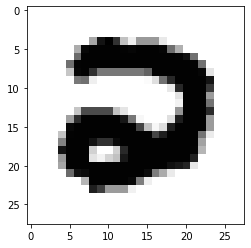

In [ ]:
# Observamos graficamente el numero dibujado y el valor que predijo el modelo

image_index = 1352
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())